# EDA on FIFA World Cup Matches

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

In [3]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
world_cups = pd.read_csv('WorldCups.csv')
players = pd.read_csv('WorldCupPlayers.csv')
matches = pd.read_csv('WorldCupMatches.csv')

In [5]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [9]:
matches.dropna(subset=['Year'], inplace=True)

In [10]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [11]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [12]:
matches[matches['Home Team Name'].str.contains('rn">')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
414,1990.0,09 Jun 1990 - 17:00,Group D,Renato Dall Ara,Bologna,"rn"">United Arab Emirates",0.0,2.0,Colombia,,30791.0,0.0,0.0,COURTNEY George (ENG),TAKADA Shizuo (JPN),SNODDY Alan (NIR),322.0,119.0,UAE,COL
433,1990.0,17 Jun 1990 - 17:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",0.0,0.0,Egypt,,33288.0,0.0,0.0,VAN LANGENHOVE Marcel (BEL),QUINIOU Joel (FRA),LO BELLO Rosario (ITA),322.0,152.0,IRL,EGY
446,1990.0,21 Jun 1990 - 21:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",1.0,1.0,Netherlands,,33288.0,0.0,1.0,VAUTROT Michel (FRA),LORENC Richard (AUS),HANSAL Mohamed (ALG),322.0,228.0,IRL,NED
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),31818.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU
492,1994.0,28 Jun 1994 - 12:30,Group E,Giants Stadium,New York/New Jersey,"rn"">Republic of Ireland",0.0,0.0,Norway,,72404.0,0.0,0.0,TORRES CADENA Jose Joaquin (COL),ALVES Paulo Jorge (BRA),PARK Hae-Yong (KOR),337.0,3077.0,IRL,NOR
582,2002.0,01 Jun 2002 - 15:30,Group E,Niigata Stadium Big Swan,Niigata,"rn"">Republic of Ireland",1.0,1.0,Cameroon,,33679.0,0.0,1.0,KAMIKAWA Toru (JPN),AWANG HAMAT Mat Lazim (MAS),VAN NYLEN Roland (BEL),43950100.0,43950002.0,IRL,CMR
647,2006.0,10 Jun 2006 - 18:00,Group B,"FIFA World Cup Stadium, Dortmund",Dortmund,"rn"">Trinidad and Tobago",0.0,0.0,Sweden,,62959.0,0.0,0.0,MAIDIN Shamsul (SIN),PERMPANICH Prachya (THA),GHULOUM Eisa (UAE),97410100.0,97410004.0,TRI,SWE
649,2006.0,11 Jun 2006 - 15:00,Group C,Zentralstadion,Leipzig,"rn"">Serbia and Montenegro",0.0,1.0,Netherlands,,43000.0,0.0,1.0,MERK Markus (GER),SCHRAER Christian (GER),SALVER Jan-Hendrik (GER),97410100.0,97410006.0,SCG,NED
813,2014.0,25 Jun 2014 - 13:00,Group F,Arena Fonte Nova,Salvador,"rn"">Bosnia and Herzegovina",3.0,1.0,IR Iran,,48011.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255931.0,300186464.0,BIH,IRN


In [13]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [14]:
names.index

Index(['rn">Republic of Ireland', 'rn">United Arab Emirates',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'],
      dtype='object')

In [15]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [16]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [17]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [18]:
wrong = wrong + old
correct = correct + new

In [19]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracanã Stadium',
  'Maracanã Stadium'])

In [20]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [21]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

## Most Number of World Cup Winning Title

In [22]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549


In [23]:
winner = world_cups['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [24]:
runnerup = world_cups['Runners-Up'].value_counts()
runnerup

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [25]:
third = world_cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [26]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams=teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [27]:
teams.iplot(kind='bar', xTitle='Teams', yTitle='Count', title='FIFA World Cup Winning Countries')

## Number of Goals per Country

In [28]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [29]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [30]:
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [31]:
away

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [32]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [33]:
goals = home.append(away, ignore_index=True)

C:\Users\Emanuel\AppData\Local\Temp\ipykernel_15996\781441058.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [35]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [36]:
goals = goals.sort_values(by='Goals', ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [37]:
goals[:31].iplot(kind='bar', xTitle='Country Names', yTitle='Goals', title='Countries Hits Most Number of Goals')

## Attendance, Number of Teams, Goals, and Matches per Cup

In [38]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549


In [39]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace(".", "")

C:\Users\Emanuel\AppData\Local\Temp\ipykernel_15996\805419797.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [40]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


In [41]:
# world_cups['Attendance'].astype(int)

C:\Users\Emanuel\AppData\Local\Temp\ipykernel_15996\3392563800.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



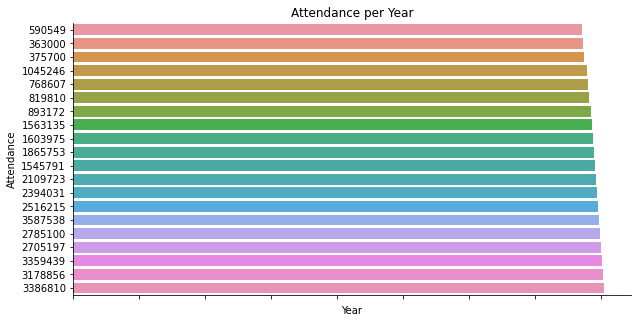

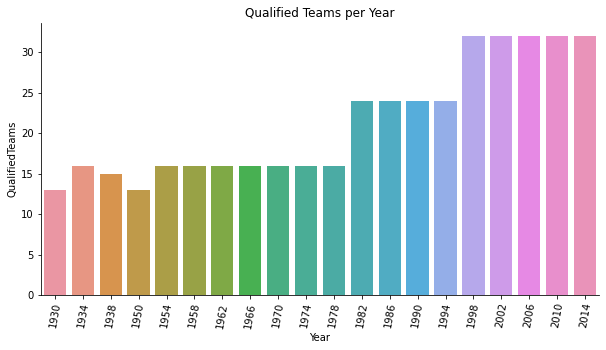

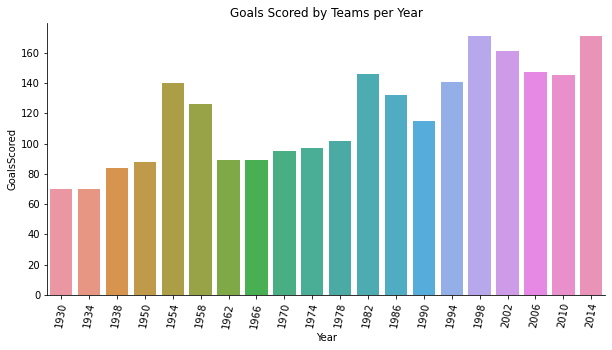

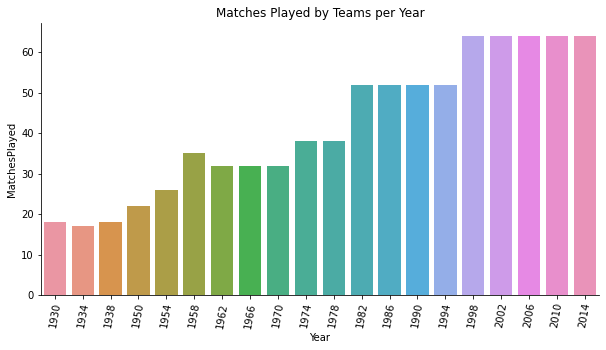

In [42]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right=True)
g = sns.barplot(x='Year', y='Attendance', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Attendance per Year')

# ==============================

fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right=True)
g = sns.barplot(x='Year', y='QualifiedTeams', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Qualified Teams per Year')

# ==============================

fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right=True)
g = sns.barplot(x='Year', y='GoalsScored', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Goals Scored by Teams per Year')

# ==============================

fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right=True)
g = sns.barplot(x='Year', y='MatchesPlayed', data=world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation=80)
g.set_title('Matches Played by Teams per Year')

plt.show()

## Goals per Team per World Cup

In [43]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [44]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [45]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [46]:
goals = pd.concat([home, away], axis=1)
goals

Home Team Goals  Away Team Goals
Year                                              
1930.0 Argentina             16.0              2.0
       Brazil                 4.0              1.0
       Chile                  4.0              1.0
       France                 4.0              0.0
       Paraguay               1.0              0.0
...                           ...              ...
1998.0 Iran                   NaN              2.0
       Mexico                 NaN              8.0
       Norway                 NaN              5.0
       Tunisia                NaN              1.0
2006.0 IR Iran                NaN              0.0

[427 rows x 2 columns]

In [47]:
goals.fillna(0, inplace=True)
goals

Home Team Goals  Away Team Goals
Year                                              
1930.0 Argentina             16.0              2.0
       Brazil                 4.0              1.0
       Chile                  4.0              1.0
       France                 4.0              0.0
       Paraguay               1.0              0.0
...                           ...              ...
1998.0 Iran                   0.0              2.0
       Mexico                 0.0              8.0
       Norway                 0.0              5.0
       Tunisia                0.0              1.0
2006.0 IR Iran                0.0              0.0

[427 rows x 2 columns]

In [48]:
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals

Home Team Goals  Away Team Goals  Goals
Year                                                     
1930.0 Argentina             16.0              2.0   18.0
       Brazil                 4.0              1.0    5.0
       Chile                  4.0              1.0    5.0
       France                 4.0              0.0    4.0
       Paraguay               1.0              0.0    1.0
...                           ...              ...    ...
1998.0 Iran                   0.0              2.0    2.0
       Mexico                 0.0              8.0    8.0
       Norway                 0.0              5.0    5.0
       Tunisia                0.0              1.0    1.0
2006.0 IR Iran                0.0              0.0    0.0

[427 rows x 3 columns]

In [49]:
goals = goals.drop(labels=['Home Team Goals', 'Away Team Goals'], axis=1)
goals

Goals
Year                   
1930.0 Argentina   18.0
       Brazil       5.0
       Chile        5.0
       France       4.0
       Paraguay     1.0
...                 ...
1998.0 Iran         2.0
       Mexico       8.0
       Norway       5.0
       Tunisia      1.0
2006.0 IR Iran      0.0

[427 rows x 1 columns]

In [50]:
goals = goals.reset_index()

In [51]:
goals

,Year,level_1,Goals
0,1930.0,Argentina,18.0
1,1930.0,Brazil,5.0
2,1930.0,Chile,5.0
3,1930.0,France,4.0
4,1930.0,Paraguay,1.0
...,...,...,...
422,1998.0,Iran,2.0
423,1998.0,Mexico,8.0
424,1998.0,Norway,5.0
425,1998.0,Tunisia,1.0


In [52]:
goals.columns = ['Year', 'Country', 'Goals']
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
1,1930.0,Brazil,5.0
2,1930.0,Chile,5.0
3,1930.0,France,4.0
4,1930.0,Paraguay,1.0
...,...,...,...
422,1998.0,Iran,2.0
423,1998.0,Mexico,8.0
424,1998.0,Norway,5.0
425,1998.0,Tunisia,1.0


In [53]:
goals = goals.sort_values(by=['Year', 'Goals'], ascending=[True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
...,...,...,...
355,2014.0,Japan,2.0
361,2014.0,Russia,2.0
340,2014.0,Cameroon,1.0
352,2014.0,Honduras,1.0


In [54]:
top5 = goals.groupby('Year').head(5)
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
13,1934.0,Italy,12.0
11,1934.0,Germany,11.0
10,1934.0,Czechoslovakia,9.0
9,1934.0,Austria,7.0
12,1934.0,Hungary,5.0


In [55]:
import plotly.graph_objects as go

In [56]:
x, y = goals['Year'].values, goals['Goals'].values

In [57]:
data = []

for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x=year, y=goal, name=team))
    
layout = go.Layout(barmode='stack', title='Top 5 Teams with Most Goals', showlegend=False)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Matches with Highest Number of Attendance

In [58]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [59]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [60]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y'))

In [61]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [62]:
top10 = matches.sort_values(by='Attendance', ascending=False)[:10]
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,"16 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950.0,"13 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950.0,"01 Jul, 1950",Group 1,Maracanã Stadium,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950.0,"09 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
379,1986.0,"07 Jun, 1986",Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR
411,1986.0,"29 Jun, 1986",Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany,,114600.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG
397,1986.0,"15 Jun, 1986",Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,114580.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL
407,1986.0,"22 Jun, 1986",Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,114580.0,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG
409,1986.0,"25 Jun, 1986",Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,114500.0,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL
367,1986.0,"03 Jun, 1986",Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,110000.0,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX


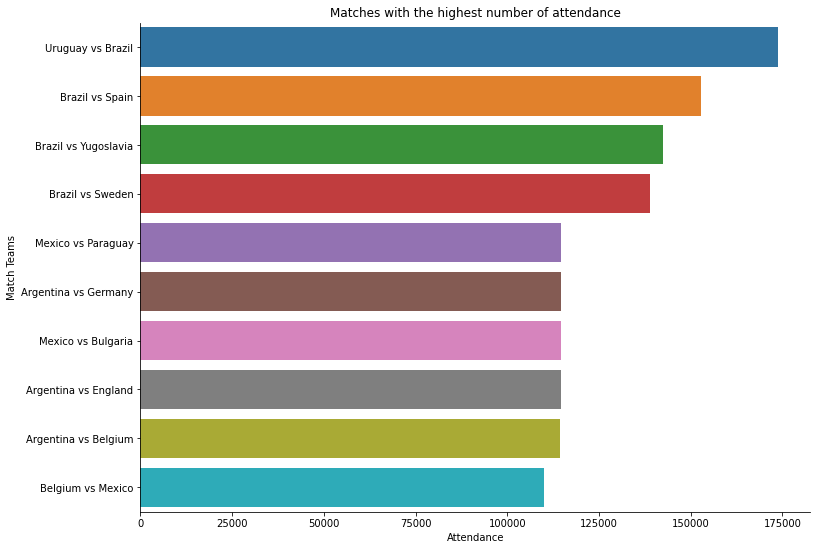

In [65]:
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize=(12, 9))

ax = sns.barplot(y=top10['vs'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of attendance')

plt.show()

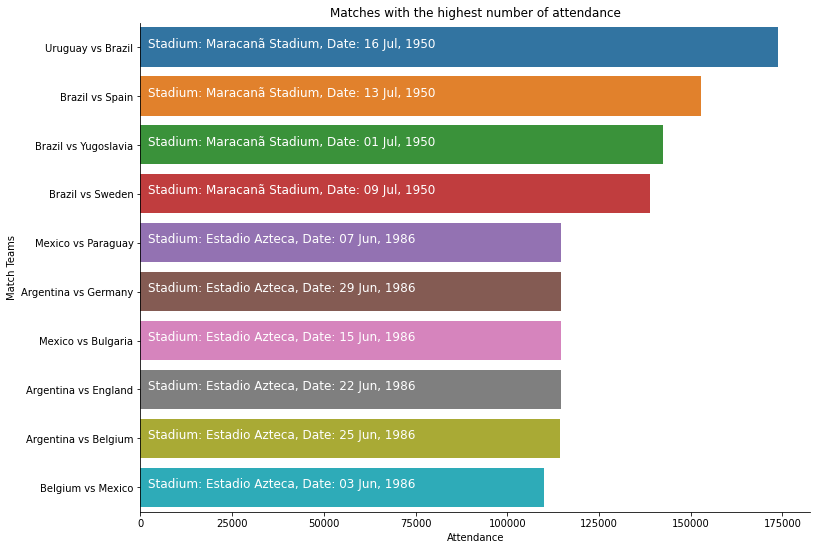

In [70]:
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize=(12, 9))

ax = sns.barplot(y=top10['vs'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of attendance')

for i, s in enumerate("Stadium: " + top10['Stadium'] + ", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize=12, color='white')

plt.show()

## Stadium with Highest Average Attendance

In [71]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [72]:
matches['Year'] = matches['Year'].astype(int)

In [73]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [75]:
std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)
std

,Stadium,City,Attendance
32,Estadio Azteca,Mexico City,100923.684211
136,Rose Bowl,Los Angeles,92600.875000
178,Wembley Stadium,London,86448.222222
98,Maracanã Stadium,Rio De Janeiro,86417.333333
150,Soccer City Stadium,Johannesburg,83857.375000
...,...,...,...
64,Giorgio Ascarelli,Naples,8000.000000
75,Independencia,Belo Horizonte,7590.333333
48,Eucaliptos,Porto Alegre,7329.000000
57,Fort Carree,Antibes,7000.000000


In [91]:
top10 = std[:10]
top10

,Stadium,City,Attendance
32,Estadio Azteca,Mexico City,100923.684211
136,Rose Bowl,Los Angeles,92600.875000
178,Wembley Stadium,London,86448.222222
98,Maracanã Stadium,Rio De Janeiro,86417.333333
150,Soccer City Stadium,Johannesburg,83857.375000
145,Santiago Bernabeu,Madrid,82522.250000
166,Stanford Stadium,San Francisco,81737.333333
158,Stade de France,Saint-Denis,78222.222222
63,Giants Stadium,New York/New Jersey,73689.714286
163,Stadio Olimpico,Rome,73373.000000


In [81]:
top10Ch = top10

In [85]:
top10Ch['Attendance'] = round(top10Ch['Attendance']).astype(str)

In [86]:
top10Ch['Attendance']

32     100924.0
136     92601.0
178     86448.0
98      86417.0
150     83857.0
145     82522.0
166     81737.0
158     78222.0
63      73690.0
163     73373.0
Name: Attendance, dtype: object

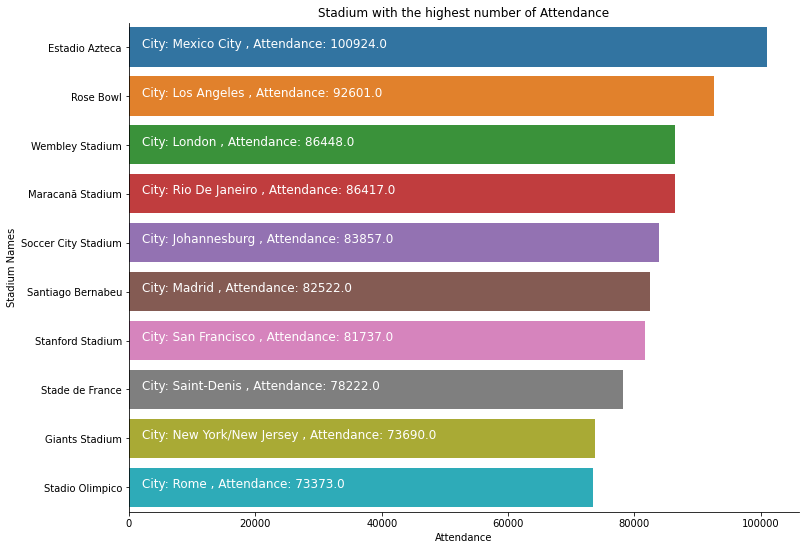

In [93]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(y=top10['Stadium'], x=top10['Attendance'])
sns.despine(right=True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the highest number of Attendance')

for i, s in enumerate("City: " + top10['City'] + ", Attendance: " + top10Ch['Attendance']):
    ax.text(2000, i, s, fontsize=12, color='white')

plt.show()

In [94]:
matches['City'].value_counts()[:20].iplot(kind='bar')

## Match outcomes by home and away teams

In [95]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [96]:
matches['Outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [99]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Outcome
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [104]:
mt = matches['Outcome'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: Outcome, dtype: int64

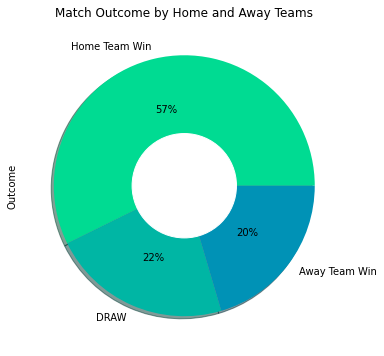

In [106]:
plt.figure(figsize=(6, 6))

mt.plot.pie(autopct="%1.0f%%", colors=sns.color_palette('winter_r'), shadow=True)

c=plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(c)
plt.title('Match Outcome by Home and Away Teams')
plt.show()